In [49]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [50]:
import csv

In [51]:
# offsetGuideVar
# optimizationSteps
# penaltyVariance
# returnValuesParticles
# slopeGuideVar
# stepSize
# threshold

param_name = 'offsetGuideVar'
data = list(csv.reader(open('%s.csv' % param_name)))

In [52]:
data = sorted(data, key = lambda x: float(x[0]))

In [53]:
param_vals = [float(x[0]) for x in data]
runtimes = [float(x[1])/1000.0 for x in data]
distances = [[float(i) for i in x[2:]] for x in data]
num_runs = len(data)

In [54]:
%Rpush num_runs
%Rpush param_name
%Rpush param_vals
%Rpush runtimes
%Rpush distances

  ParameterValue Runtime
1      0.1615428   9.105
2      0.5625680  56.561
3      0.5707759  53.971
4      0.6722168  74.554
5      0.7369317  71.820
6      0.9060032  84.563
7      1.0160158  81.420
8      1.0199118  80.432


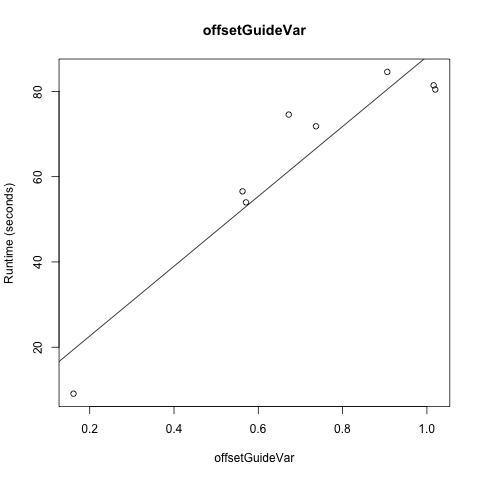

In [55]:
%%R

d <- data.frame(ParameterValue=param_vals, Runtime=runtimes)
regression_line <- lm(Runtime ~ ParameterValue, d)
plot(Runtime ~ ParameterValue, 
     d,
     main=param_name, 
     ylab="Runtime (seconds)",
     xlab=param_name)
abline(regression_line)

d

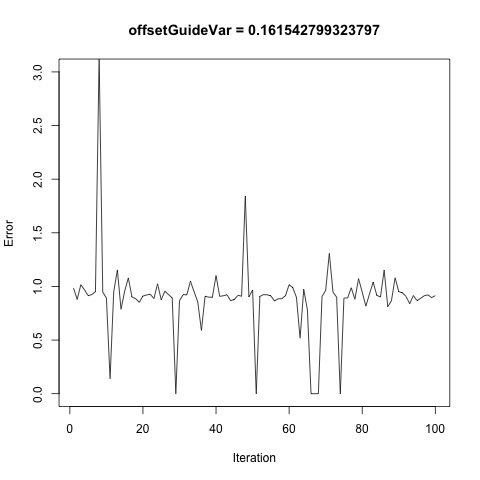

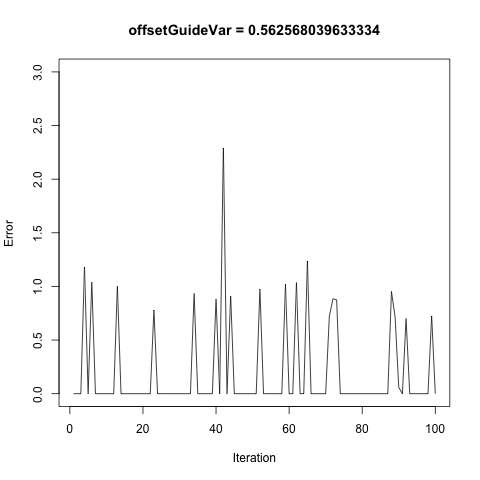

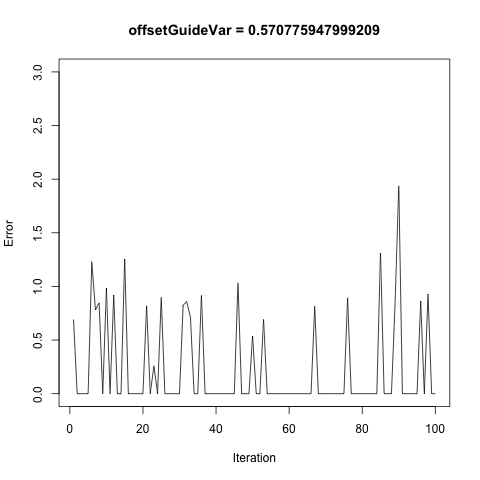

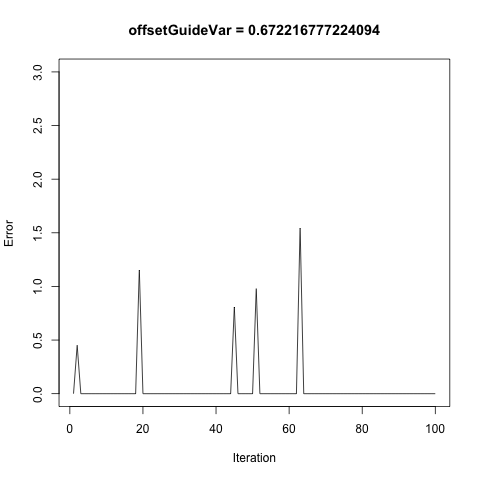

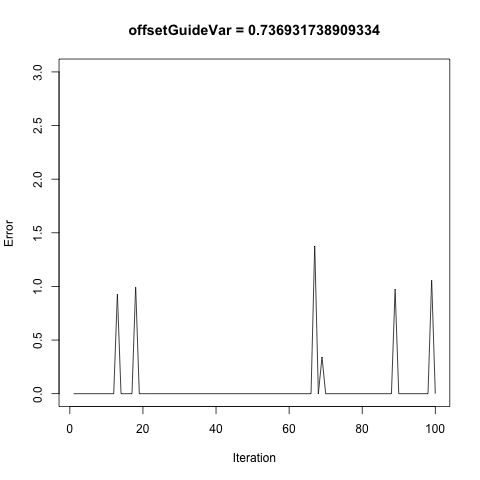

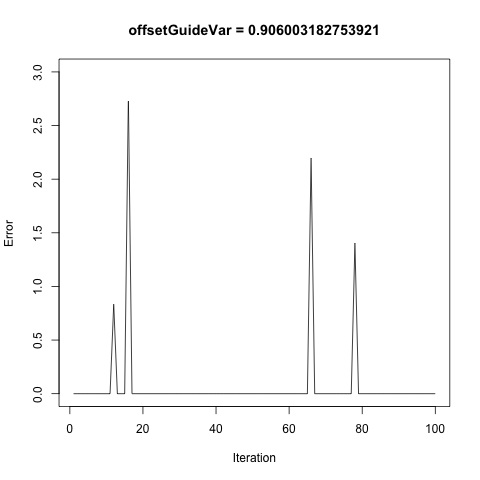

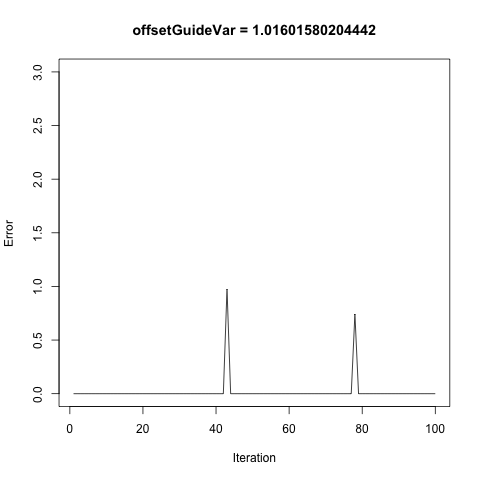

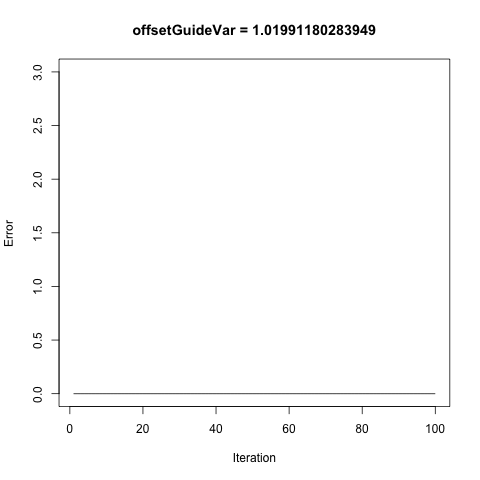

In [56]:
%%R

for(i in 1:num_runs) {
  matplot(
      t(distances)[i,], 
      type="l", 
      main=paste(param_name, "=", param_vals[i]), 
      xlab="Iteration", 
      ylab="Error", 
      ylim=c(0, 3))
}